# DOG BREED RECOGNITION
<br>

@author: Juarez Monteiro

---

# Dog Breed Recognition - Analysis

Neste Notebook iremos analisar os resultados obtidos pelos modelos propostos por mim neste teste prático. Iremos observar que o modelo ResNet-50 se mostrou superior aos demais modelos. Infelizmente não foi possível realizar mais experimentos com esse modelo, tal como descongelar mais camadas para o pré-treino por motivos de poder computacional e tempo.

---

### Modelos avaliados:

<br>

- ### ResNet-18 Baseline - [Acesse aqui os logs de treino](https://wandb.ai/jrzmnt/dog-breed-lightning/reports/Dog-Breed-Recognition-ResNet-18-Baseline--VmlldzoxMTI1OTI4?accessToken=kq8jev5qloykl6rupaf5rv94mlvrdhvxn5ms9xau3rvclxx8dz0kpfw4nome0cbt) <br>
    - **Não contém** Data Augmentation, LR Scheduler, e LR Finder;
    - Contém Early Stopping e utiliza os pesos do ImageNet como pré-treino;
    - Aprende somente uma camada nova definida no modelo (FC); <br> <br>


- ### ResNet-18 Enhanced (FC) - [Acesse aqui os logs de treino](https://wandb.ai/jrzmnt/dog-breed-lightning/reports/Dog-Breed-Recognition-ResNet-18-Enhanced-FC---VmlldzoxMTI3OTQ1?accessToken=0b17k9c6mmeez7ceec8k7ye7cs3pn2n6msguagcisnckd4m93928btqqazrn28ls) <br>
    - **Contém** Data Augmentation (RandomResizedCrop e RandomHorizontalFlip), LR Scheduler (ExponentialLR), e LR Finder;
    - Contém Early Stopping e utiliza os pesos do ImageNet como pré-treino;
    - Aprende somente uma camada nova definida no modelo (FC); <br> <br>


- ### ResNet-18 Enhanced (FC + Layer4) - [Acesse aqui os logs de treino](https://wandb.ai/jrzmnt/dog-breed-lightning/reports/Dog-Breed-Recognition-ResNet-18-Enhanced-FC-Layer4---VmlldzoxMTMxMDY0?accessToken=4jo7mlb7mpgoudxxyrnxuprs1x7ibpnx9iqrcli7263bpu7z4inu8p9t0yfvm7xv) <br>
    - Contém Data Augmentation (RandomResizedCrop e RandomHorizontalFlip), LR Scheduler (ExponentialLR), e LR Finder;
    - Contém Early Stopping e utiliza os pesos do ImageNet como pré-treino;
    - Aprende  uma camada nova definida no modelo (FC) **e também um bloco inteiro do modelo** o qual foi descongelado no processo de pré-treino; <br> <br>

- ### ResNet-50 Enhanced (FC) - [Acesse aqui os logs de treino](https://wandb.ai/jrzmnt/dog-breed-lightning/reports/Dog-Breed-Recognition-ResNet-50-Enhanced--VmlldzoxMTI4OTUx?accessToken=m3tjxn2hd854uapd0jjdl6pf1ccjckgamdvx43hkvobtgi3qre1l74mm69b71ch0)  <br>
    - **Contém** Data Augmentation (RandomResizedCrop e RandomHorizontalFlip), LR Scheduler (ExponentialLR), e LR Finder;
    - Contém Early Stopping e utiliza os pesos do ImageNet como pré-treino;
    - Aprende somente uma camada nova definida no modelo (FC); <br> <br>


---

### Iniciaremos com os imports principais desse notebook

In [25]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

### Definição dos locais onde estão arquivadas as predições

In [26]:
BASE_DIR = './../reports/results/'
FIG_DIR = './../reports/figures/'
class_dict = './../reports/class_dict.npy'
dog_model_resnet18_baseline_results = BASE_DIR+'resnet18-baseline-validation-results-ytrue-ypred.npy'
dog_model_resnet18_enhanced_fc_results = BASE_DIR+'resnet18-enhanced-fc-validation-results-ytrue-ypred.npy'
dog_model_resnet18_enhanced_fc_layer4_results = BASE_DIR+'resnet18-enhanced-fc--layer4-validation-results-ytrue-ypred.npy'
dog_model_resnet50_enhanced_fc_results = BASE_DIR+'resnet50-validation-results-ytrue-ypred.npy'

class_dict = np.load(class_dict, allow_pickle=True)
class_dict = class_dict.item()

## Analisando os Resultados

Primeiramente iniciamos carregando os resultados salvos no formato `.npy`. Após isso iremos analisar o resultado do modelo em relação aos dados de validação (3420 imagens).

## Relatório Sklearn

In [27]:
def report(results_file, class_dict):
    y_true, y_pred = np.load(results_file)
    cr = classification_report(y_true, y_pred, target_names=class_dict.keys())
    
    return cr

## Matriz de Confusão

Apesar da dificuldade em visualizar uma matriz de confusão contendo 100 classes, é interessante plotarmos e tentarmos analisar caso exista algum erro da rede mais preocupante. A matriz de confusão gerada abaixo foi normalizada pelos valores verdadeiros (as linhas da matriz ou *true labels*), ou seja, o que será apresentado em evidência na figura é o quão **preciso** o modelo é. É possível identificar que a diagonal da matriz de confusão se destaca, nos fornecendo a informação de que o modelo é preciso para a maioria das predições, mas que ainda assim conseguimos observar alguns pontos de erro na classificação.

In [28]:
def cmatrix(results_file, class_dict, plot_title='Confusion Matrix', save_img=False, path_img=None):
    y_true, y_pred = np.load(results_file)
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    plt.rcParams.update({'font.size': 50})

    df_cm = pd.DataFrame(cm, index = [i for i in class_dict.keys()],
                         columns = [i for i in class_dict.keys()])

    plt.figure(figsize = (80,55))
    
    plt.title(plot_title, fontsize=120, pad=120)
    
    sn.heatmap(df_cm, annot=False, linewidths=.5, cmap='viridis')
    
    if save_img:
        sn_plot.savefig(path_img)

## Acurácia

In [29]:
def accuracy_report(results_file):
    y_true, y_pred = np.load(results_file)
    resnet50_score = accuracy_score(y_true, y_pred, normalize=False)
    resnet50_accuracy = accuracy_score(y_true, y_pred)
    
    return resnet50_score, resnet50_accuracy

## ResNet-18 Baseline

In [30]:
y_true, y_pred = np.load(dog_model_resnet18_baseline_results)

In [31]:
resnet18_baseline_score, resnet18_baseline_accuracy = accuracy_report(dog_model_resnet18_baseline_results)

In [32]:
print(f'ResNet18 - Accuracy: {resnet18_baseline_accuracy:.3f}, scored {resnet18_baseline_score} of {len(y_true)} validation images.')

ResNet18 - Accuracy: 0.813, scored 2781 of 3420 validation images.


In [33]:
baseline_report = report(dog_model_resnet18_baseline_results, class_dict)
print(baseline_report)

                                precision    recall  f1-score   support

                        Saluki       1.00      0.77      0.87        39
                    Weimaraner       0.95      0.90      0.93        42
                   EntleBucher       0.81      0.76      0.78        45
                      papillon       0.94      0.83      0.88        41
                   Boston_bull       1.00      0.77      0.87        39
                Sussex_spaniel       0.96      0.96      0.96        25
               Tibetan_mastiff       0.73      0.79      0.76        24
             Italian_greyhound       0.68      0.87      0.76        30
              Sealyham_terrier       0.93      0.82      0.87        45
                 Gordon_setter       0.95      0.85      0.90        41
                    Pomeranian       0.79      0.95      0.86        39
                      malamute       0.83      0.83      0.83        36
             Brabancon_griffon       0.97      0.91      0.94  

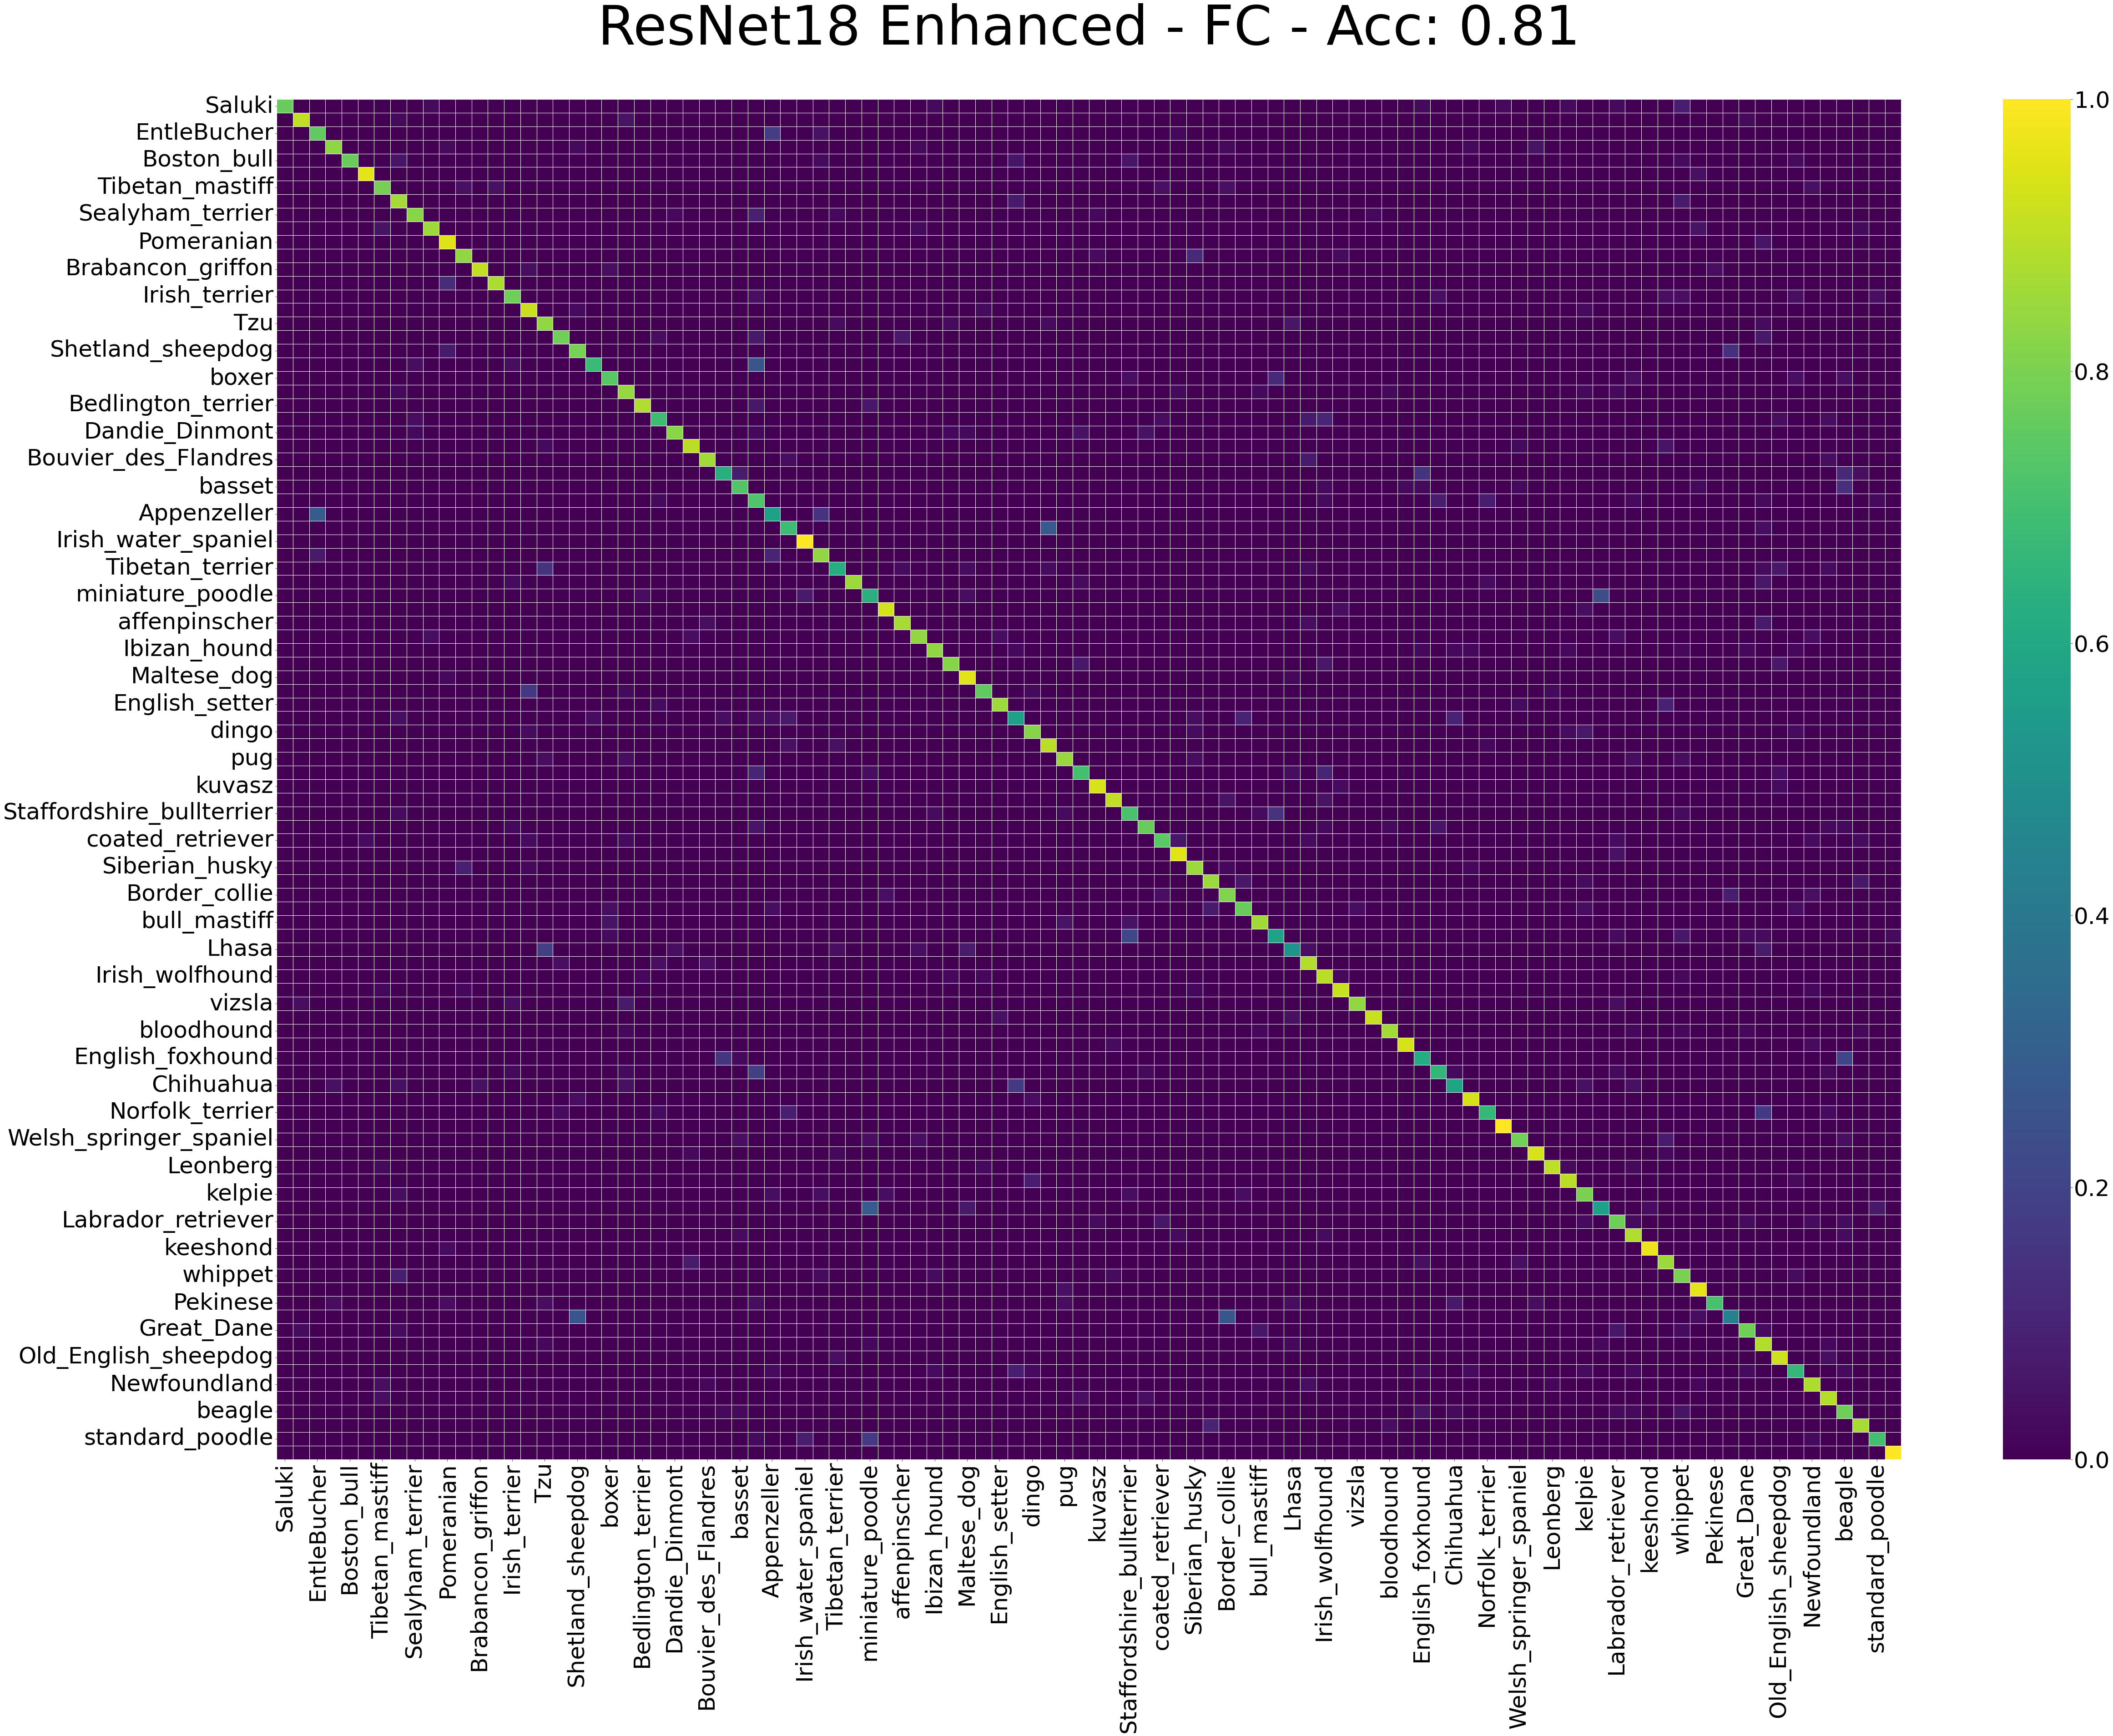

In [34]:
plot_title = f'ResNet18 Enhanced - FC - Acc: {resnet18_baseline_accuracy:.2f}'
cmatrix(dog_model_resnet18_baseline_results, class_dict, plot_title=plot_title, save_img=False, path_img=None)

## ResNet-18 Enhanced (FC)

In [35]:
y_true, y_pred = np.load(dog_model_resnet18_enhanced_fc_results)

In [36]:
resnet18_enhanced_fc_score, resnet18_enhanced_fc_accuracy = accuracy_report(dog_model_resnet18_enhanced_fc_results)

In [37]:
print(f'ResNet18 - Accuracy: {resnet18_enhanced_fc_accuracy:.3f}, scored {resnet18_enhanced_fc_score} of {len(y_true)} validation images.')

ResNet18 - Accuracy: 0.789, scored 2698 of 3420 validation images.


In [38]:
baseline_report = report(dog_model_resnet18_enhanced_fc_results, class_dict)
print(baseline_report)

                                precision    recall  f1-score   support

                        Saluki       0.62      0.83      0.71        29
                    Weimaraner       0.93      0.89      0.91        28
                   EntleBucher       0.91      0.95      0.93        42
                      papillon       0.85      0.31      0.46        35
                   Boston_bull       0.46      0.64      0.53        25
                Sussex_spaniel       0.76      0.70      0.73        44
               Tibetan_mastiff       0.73      0.76      0.75        29
             Italian_greyhound       0.74      0.90      0.81        39
              Sealyham_terrier       0.51      0.88      0.64        33
                 Gordon_setter       0.91      0.91      0.91        33
                    Pomeranian       0.79      0.86      0.83        22
                      malamute       0.91      0.71      0.80        28
             Brabancon_griffon       0.90      0.82      0.86  

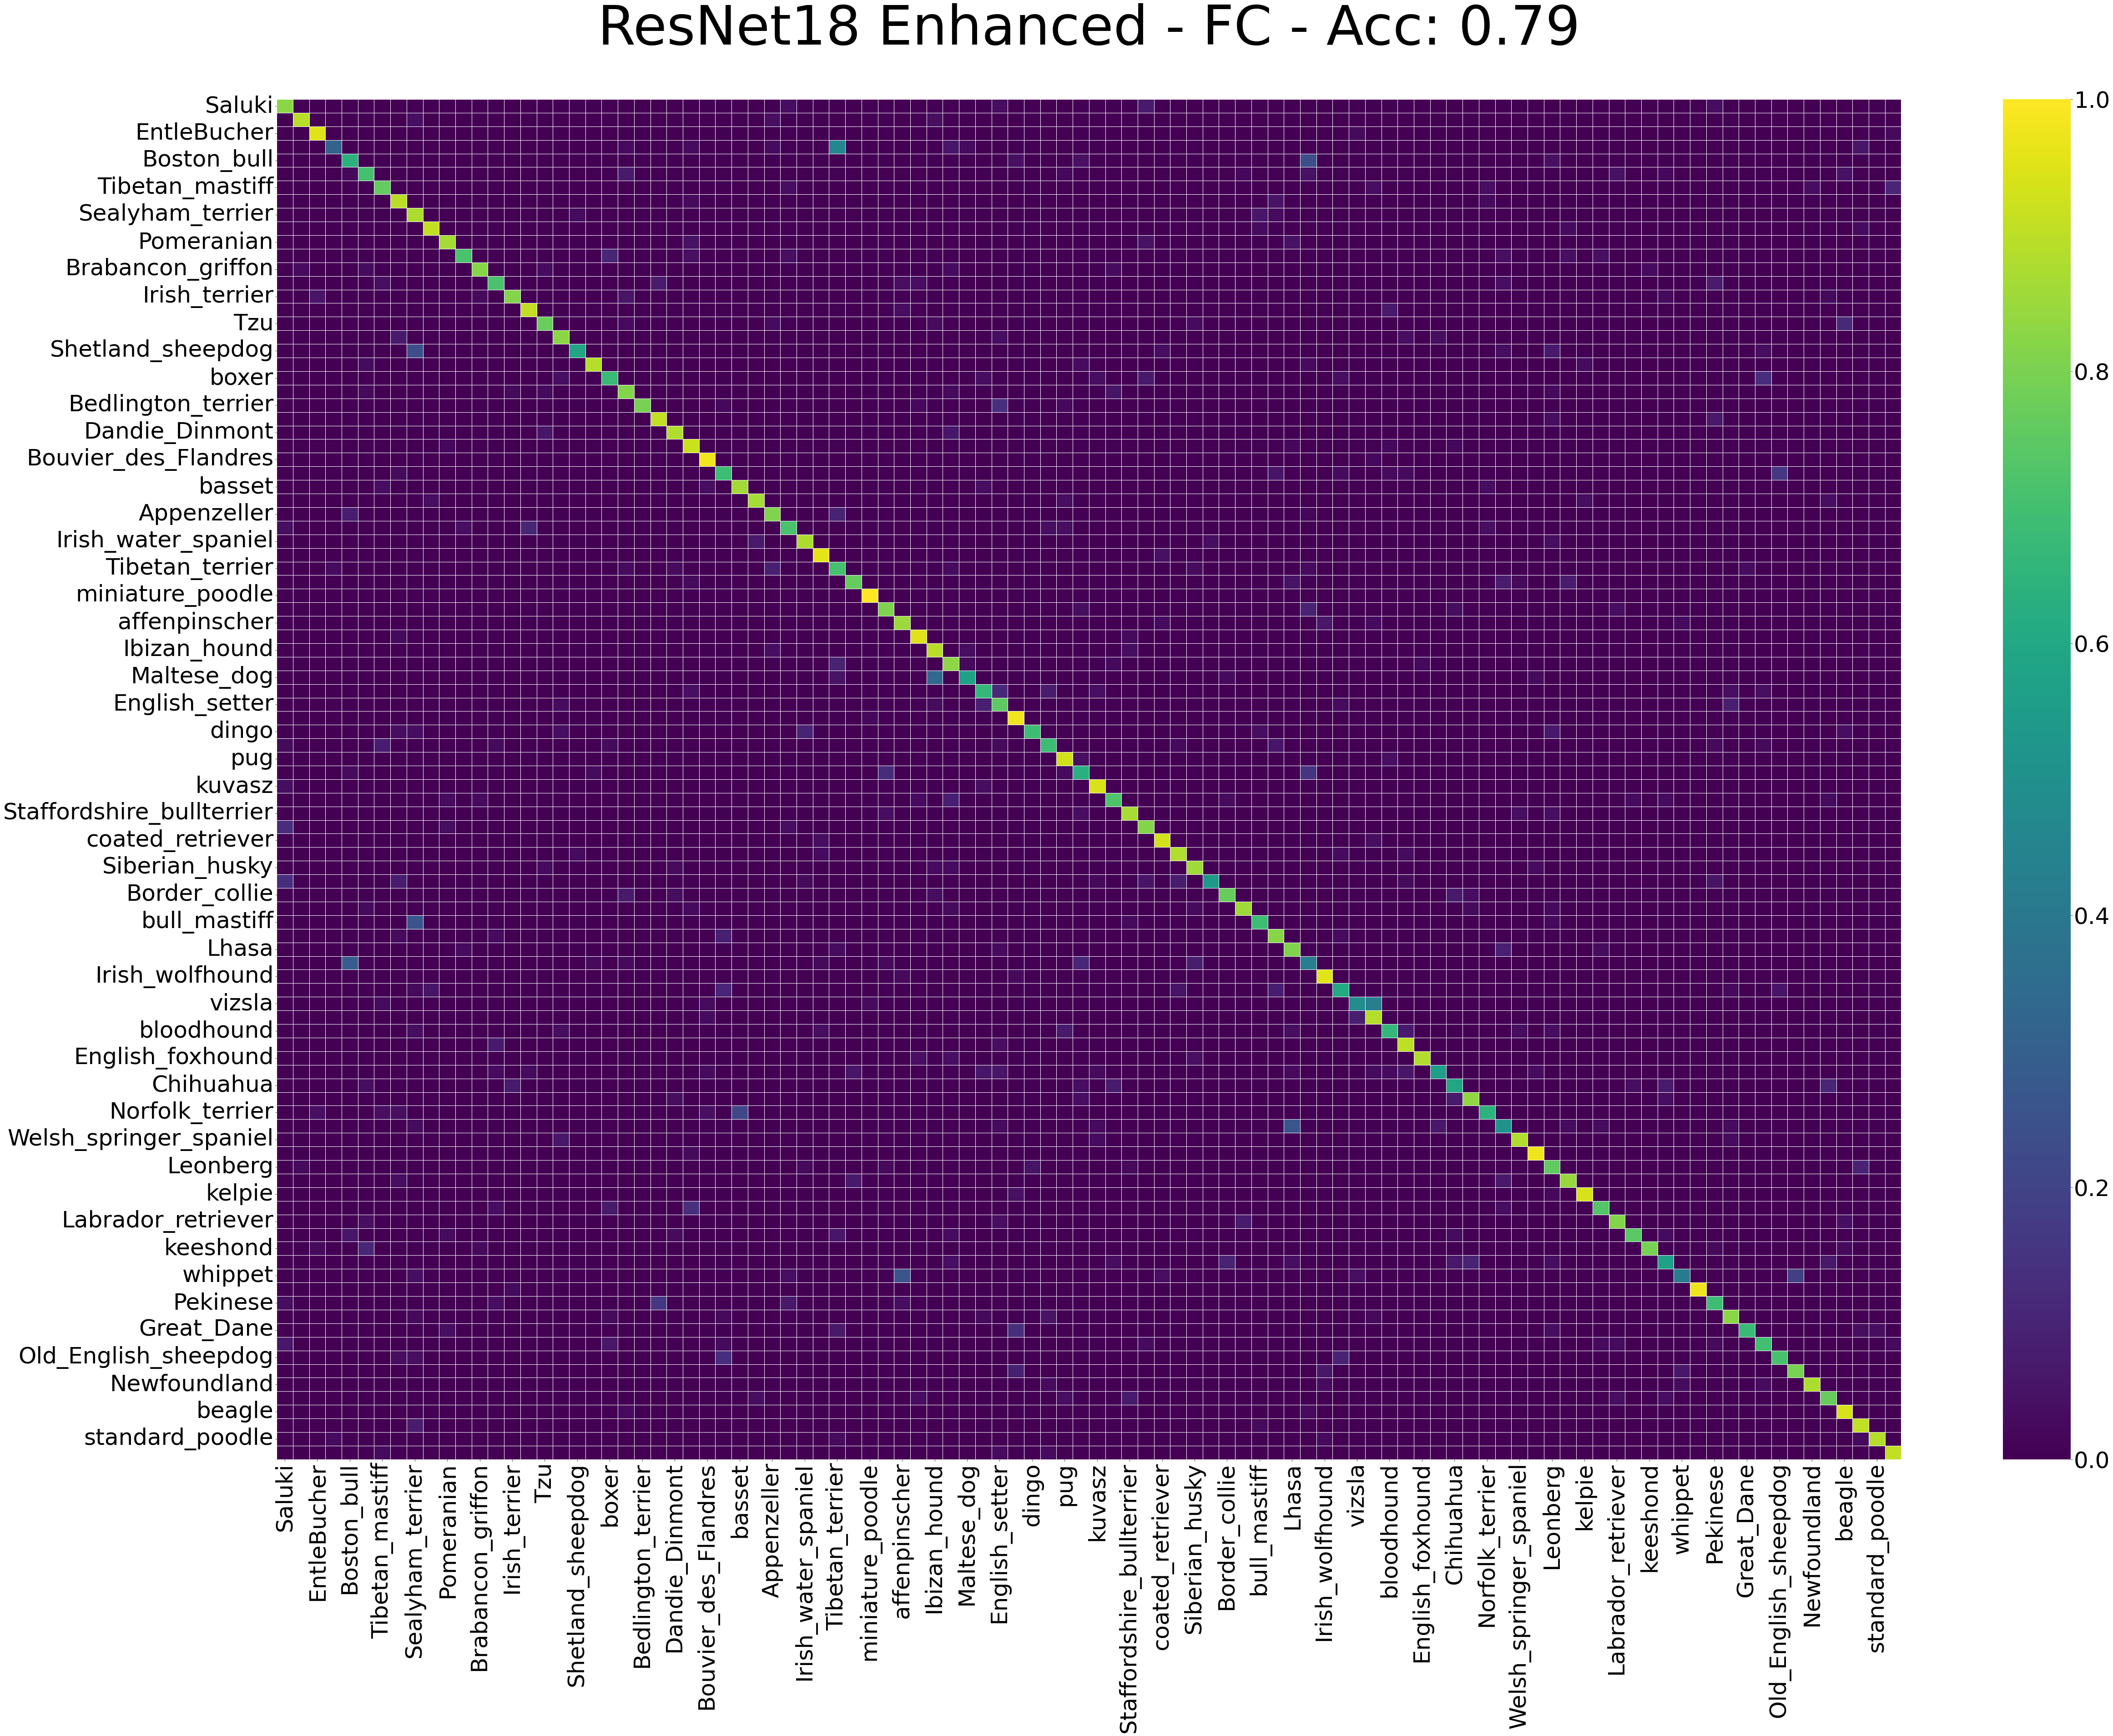

In [39]:
plot_title = f'ResNet18 Enhanced - FC - Acc: {resnet18_enhanced_fc_accuracy:.2f}'
cmatrix(dog_model_resnet18_enhanced_fc_results, class_dict, plot_title=plot_title, save_img=False, path_img=None)

## ResNet-18 Enhanced (FC+Layer4)

In [40]:
y_true, y_pred = np.load(dog_model_resnet18_enhanced_fc_layer4_results)

In [41]:
resnet18_enhanced_fc_layer4_score, resnet18_enhanced_fc_layer4_accuracy = accuracy_report(dog_model_resnet18_enhanced_fc_layer4_results)

In [42]:
print(f'ResNet18 - Accuracy: {resnet18_enhanced_fc_layer4_accuracy:.3f}, scored {resnet18_enhanced_fc_layer4_score} of {len(y_true)} validation images.')

ResNet18 - Accuracy: 0.824, scored 2817 of 3420 validation images.


In [43]:
baseline_report = report(dog_model_resnet18_enhanced_fc_layer4_results, class_dict)
print(baseline_report)

                                precision    recall  f1-score   support

                        Saluki       0.86      0.86      0.86        29
                    Weimaraner       1.00      0.89      0.94        28
                   EntleBucher       0.95      0.95      0.95        42
                      papillon       0.68      0.66      0.67        35
                   Boston_bull       0.59      0.64      0.62        25
                Sussex_spaniel       0.83      0.80      0.81        44
               Tibetan_mastiff       0.83      0.83      0.83        29
             Italian_greyhound       0.85      0.87      0.86        39
              Sealyham_terrier       0.72      0.79      0.75        33
                 Gordon_setter       0.97      1.00      0.99        33
                    Pomeranian       0.77      0.91      0.83        22
                      malamute       0.69      0.79      0.73        28
             Brabancon_griffon       0.93      0.82      0.87  

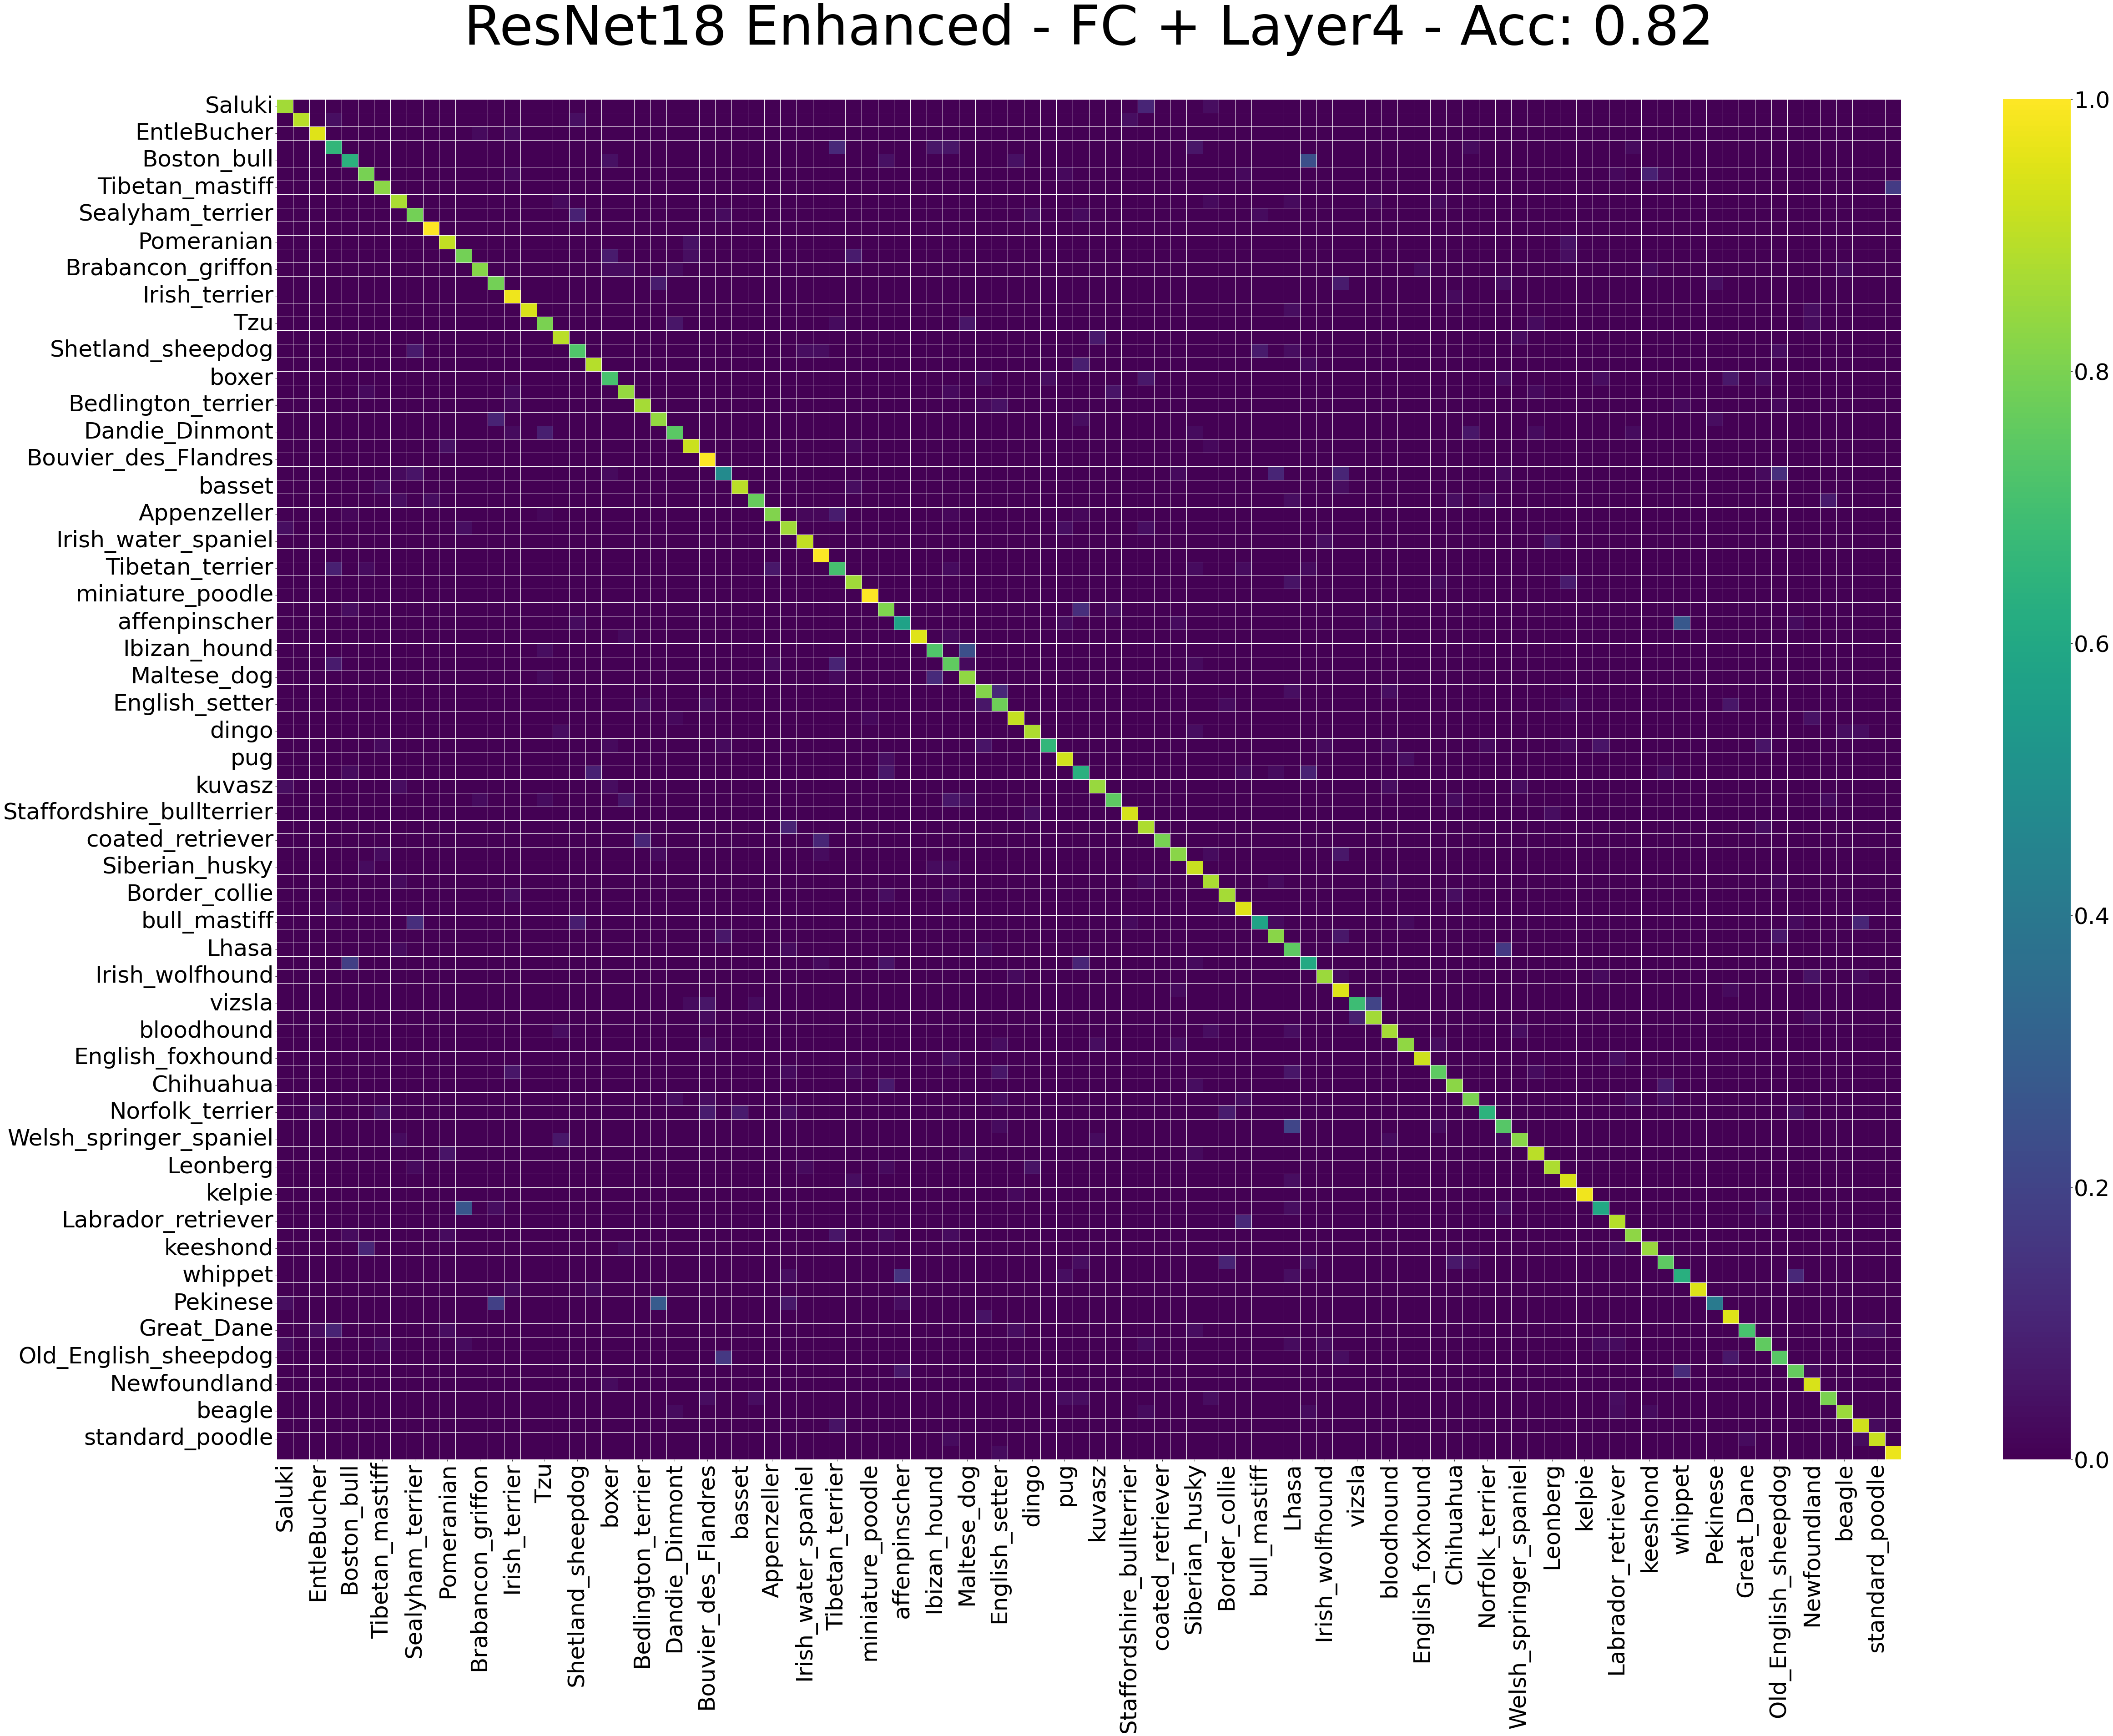

In [44]:
plot_title = f'ResNet18 Enhanced - FC + Layer4 - Acc: {resnet18_enhanced_fc_layer4_accuracy:.2f}'
cmatrix(dog_model_resnet18_enhanced_fc_layer4_results, class_dict, plot_title=plot_title, save_img=False, path_img=None)

## ResNet-50

In [45]:
resnet50_score, resnet50_accuracy = accuracy_report(dog_model_resnet50_enhanced_fc_results)

In [46]:
print(f'ResNet50 - Accuracy: {resnet50_accuracy:.3f}, scored {resnet50_score} of {len(y_true)} validation images.')

ResNet50 - Accuracy: 0.859, scored 2937 of 3420 validation images.


In [47]:
baseline_report = report(dog_model_resnet50_enhanced_fc_results, class_dict)
print(baseline_report)

                                precision    recall  f1-score   support

                        Saluki       0.97      0.86      0.91        37
                    Weimaraner       0.87      0.96      0.91        50
                   EntleBucher       0.96      0.87      0.92        31
                      papillon       0.84      0.96      0.90        28
                   Boston_bull       0.55      0.68      0.61        31
                Sussex_spaniel       0.90      0.90      0.90        30
               Tibetan_mastiff       0.89      0.93      0.91        42
             Italian_greyhound       0.95      0.95      0.95        40
              Sealyham_terrier       0.93      0.78      0.85        32
                 Gordon_setter       0.95      0.88      0.91        42
                    Pomeranian       0.91      0.94      0.93        34
                      malamute       0.80      0.90      0.85        41
             Brabancon_griffon       0.92      0.95      0.93  

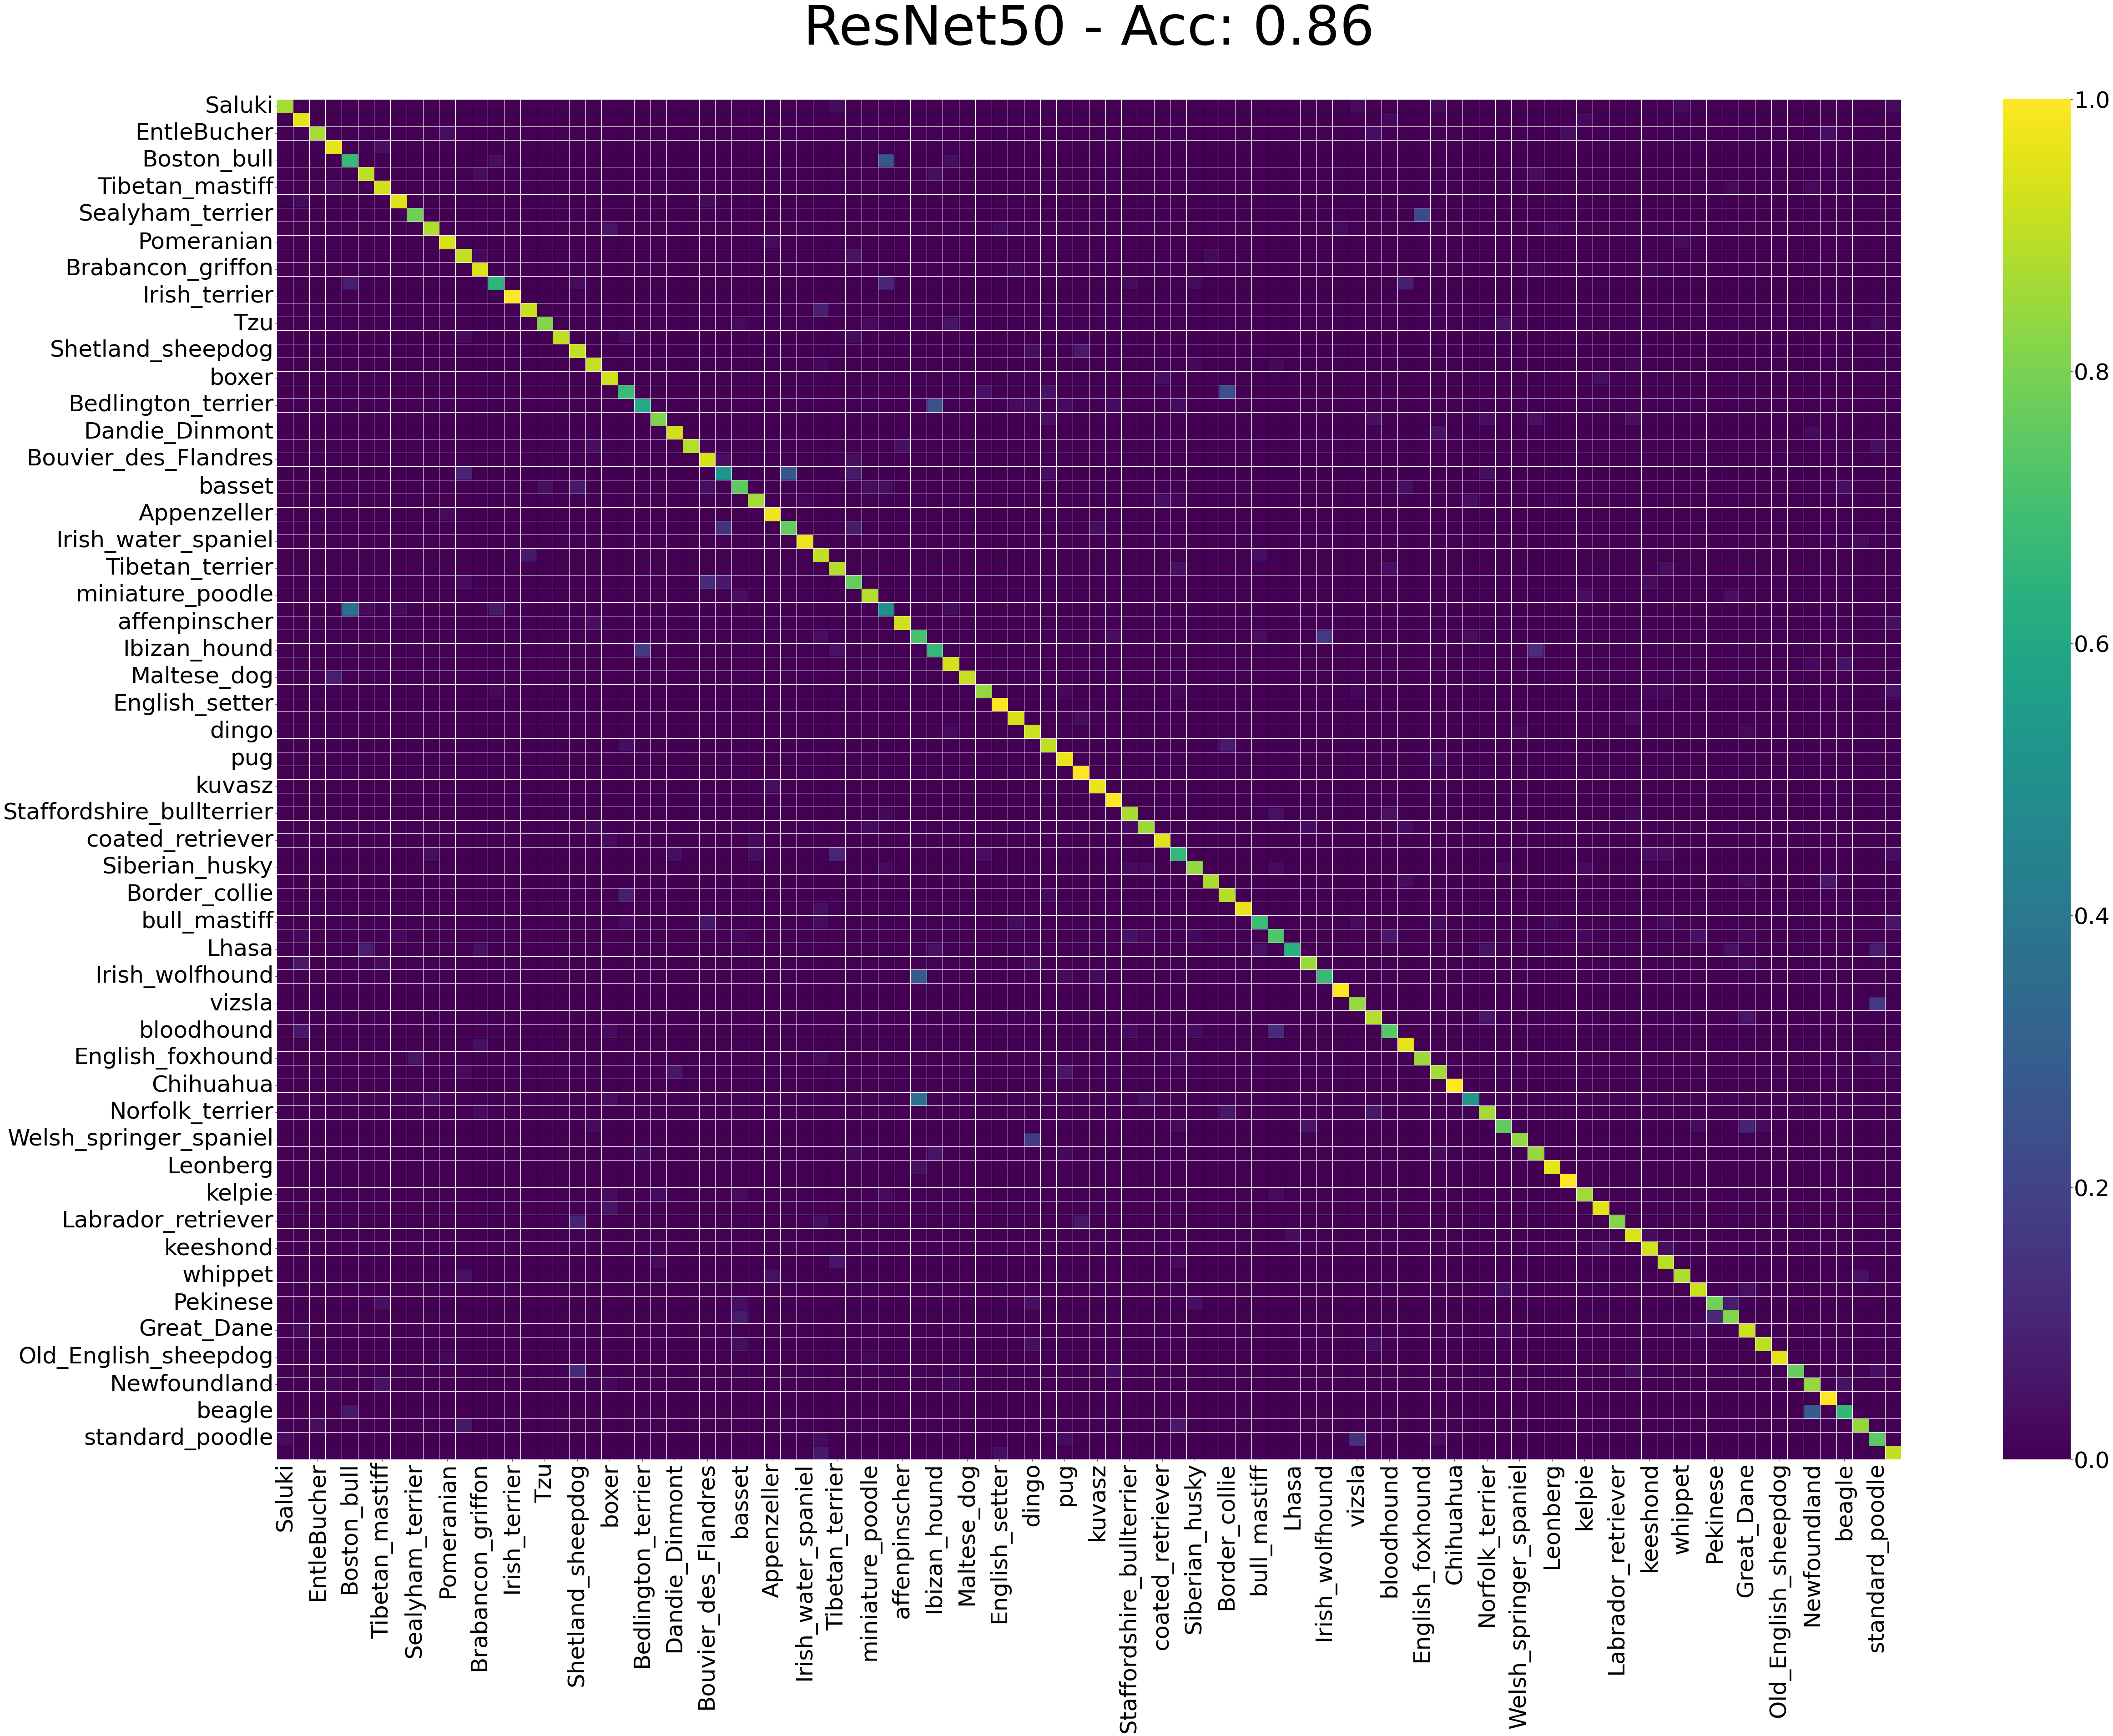

In [48]:
plot_title = f'ResNet50 - Acc: {resnet50_accuracy:.2f}'
cmatrix(dog_model_resnet50_enhanced_fc_results, class_dict, plot_title=plot_title, save_img=False, path_img=None)